In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from collections import Counter

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("RT_IOT2022.csv")


In [4]:
df

Unnamed: 0  id.orig_p  id.resp_p proto service  flow_duration  \
0                0      38667       1883   tcp    mqtt      32.011598   
1                1      51143       1883   tcp    mqtt      31.883584   
2                2      44761       1883   tcp    mqtt      32.124053   
3                3      60893       1883   tcp    mqtt      31.961063   
4                4      51087       1883   tcp    mqtt      31.902362   
...            ...        ...        ...   ...     ...            ...   
123112        2005      59247      63331   tcp       -       0.000006   
123113        2006      59247      64623   tcp       -       0.000007   
123114        2007      59247      64680   tcp       -       0.000006   
123115        2008      59247      65000   tcp       -       0.000006   
123116        2009      59247      65129   tcp       -       0.000006   

        fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
0                  9             5                  3                  3  ...   
1                  9             5                  3                  3  ...   
2                  9             5                  3                  3  ...   
3                  9             5                  3                  3  ...   
4                  9             5                  3                  3  ...   
...              ...           ...                ...                ...  ...   
123112             1             1                  0                  0  ...   
123113             1             1                  0                  0  ...   
123114             1             1                  0                  0  ...   
123115             1             1                  0                  0  ...   
123116             1             1                  0                  0  ...   

        active.std      idle.min      idle.max      idle.tot      idle.avg  \
0              0.0  2.972918e+07  2.972918e+07  2.972918e+07  2.972918e+07   
1              0.0  2.985528e+07  2.985528e+07  2.985528e+07  2.985528e+07   
2              0.0  2.984215e+07  2.984215e+07  2.984215e+07  2.984215e+07   
3              0.0  2.991377e+07  2.991377e+07  2.991377e+07  2.991377e+07   
4              0.0  2.981470e+07  2.981470e+07  2.981470e+07  2.981470e+07   
...            ...           ...           ...           ...           ...   
123112         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123113         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123114         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123115         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123116         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

        idle.std  fwd_init_window_size  bwd_init_window_size  \
0            0.0                 64240                 26847   
1            0.0                 64240                 26847   
2            0.0                 64240                 26847   
3            0.0                 64240                 26847   
4            0.0                 64240                 26847   
...          ...                   ...                   ...   
123112       0.0                  1024                     0   
123113       0.0                  1024                     0   
123114       0.0                  1024                     0   
123115       0.0                  1024                     0   
123116       0.0                  1024                     0   

        fwd_last_window_size          Attack_type  
0                        502         MQTT_Publish  
1                        502         MQTT_Publish  
2                        502         MQTT_Publish  
3                        502         MQTT_Publish  
4                        502         MQTT_Publish  
...                      ...                  ...  
123112                  1024  NMAP_XMAS_TREE_SCAN  
123113                  1024  NMAP_X

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [6]:
print(df.isnull().sum().to_string())

Unnamed: 0                  0
id.orig_p                   0
id.resp_p                   0
proto                       0
service                     0
flow_duration               0
fwd_pkts_tot                0
bwd_pkts_tot                0
fwd_data_pkts_tot           0
bwd_data_pkts_tot           0
fwd_pkts_per_sec            0
bwd_pkts_per_sec            0
flow_pkts_per_sec           0
down_up_ratio               0
fwd_header_size_tot         0
fwd_header_size_min         0
fwd_header_size_max         0
bwd_header_size_tot         0
bwd_header_size_min         0
bwd_header_size_max         0
flow_FIN_flag_count         0
flow_SYN_flag_count         0
flow_RST_flag_count         0
fwd_PSH_flag_count          0
bwd_PSH_flag_count          0
flow_ACK_flag_count         0
fwd_URG_flag_count          0
bwd_URG_flag_count          0
flow_CWR_flag_count         0
flow_ECE_flag_count         0
fwd_pkts_payload.min        0
fwd_pkts_payload.max        0
fwd_pkts_payload.tot        0
fwd_pkts_p

In [7]:
print("shape of dataset :",df.shape)

shape of dataset : (123117, 85)


In [8]:
print(df.describe().transpose().to_string())


                             count          mean           std  min           25%           50%           75%           max
Unnamed: 0                123117.0  3.703509e+04  3.045911e+04  0.0   6059.000000  3.310000e+04  6.387900e+04  9.465800e+04
id.orig_p                 123117.0  3.463926e+04  1.907062e+04  0.0  17702.000000  3.722100e+04  5.097100e+04  6.553500e+04
id.resp_p                 123117.0  1.014305e+03  5.256372e+03  0.0     21.000000  2.100000e+01  2.100000e+01  6.538900e+04
flow_duration             123117.0  3.809566e+00  1.300054e+02  0.0      0.000001  4.000000e-06  5.000000e-06  2.172834e+04
fwd_pkts_tot              123117.0  2.268826e+00  2.233656e+01  0.0      1.000000  1.000000e+00  1.000000e+00  4.345000e+03
bwd_pkts_tot              123117.0  1.909509e+00  3.301831e+01  0.0      1.000000  1.000000e+00  1.000000e+00  1.011200e+04
fwd_data_pkts_tot         123117.0  1.471218e+00  1.963520e+01  0.0      1.000000  1.000000e+00  1.000000e+00  4.345000e+03
bwd_data

In [9]:
print(df.dtypes.to_string())

Unnamed: 0                    int64
id.orig_p                     int64
id.resp_p                     int64
proto                        object
service                      object
flow_duration               float64
fwd_pkts_tot                  int64
bwd_pkts_tot                  int64
fwd_data_pkts_tot             int64
bwd_data_pkts_tot             int64
fwd_pkts_per_sec            float64
bwd_pkts_per_sec            float64
flow_pkts_per_sec           float64
down_up_ratio               float64
fwd_header_size_tot           int64
fwd_header_size_min           int64
fwd_header_size_max           int64
bwd_header_size_tot           int64
bwd_header_size_min           int64
bwd_header_size_max           int64
flow_FIN_flag_count           int64
flow_SYN_flag_count           int64
flow_RST_flag_count           int64
fwd_PSH_flag_count            int64
bwd_PSH_flag_count            int64
flow_ACK_flag_count           int64
fwd_URG_flag_count            int64
bwd_URG_flag_count          

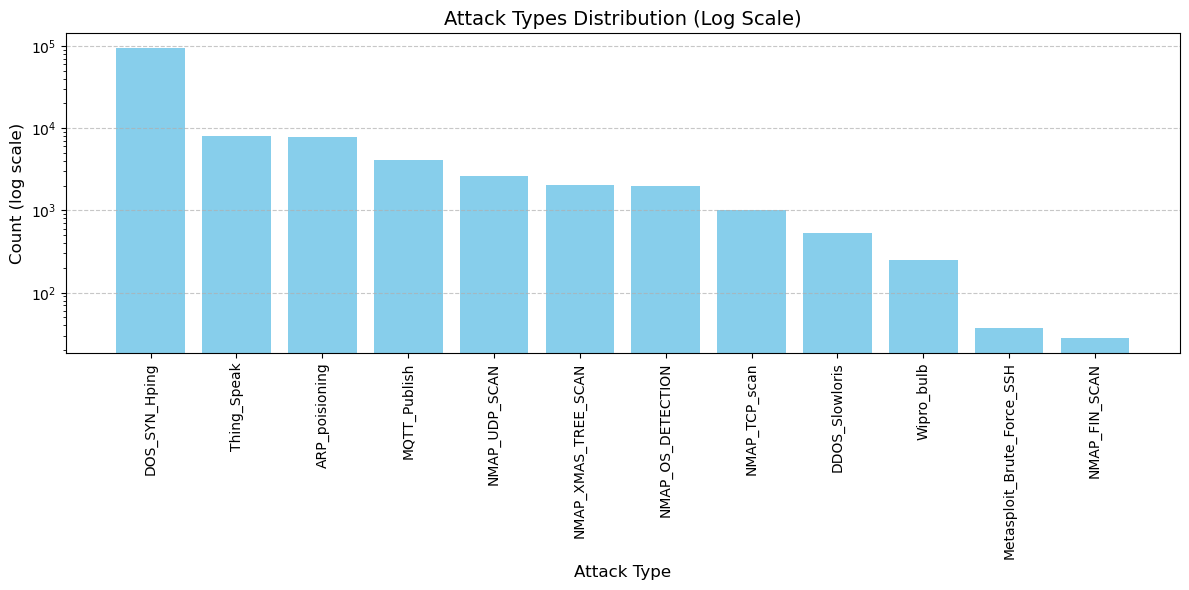

In [10]:


# Attack Types Distribution (Bar Chart)
attack_type_counts = df['Attack_type'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(attack_type_counts.index, attack_type_counts.values, color='skyblue')
plt.title('Attack Types Distribution (Log Scale)', fontsize=14)
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Count (log scale)', fontsize=12)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-labels for better readability
plt.yscale('log')  # Log scale for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for clarity
plt.tight_layout()
plt.show()




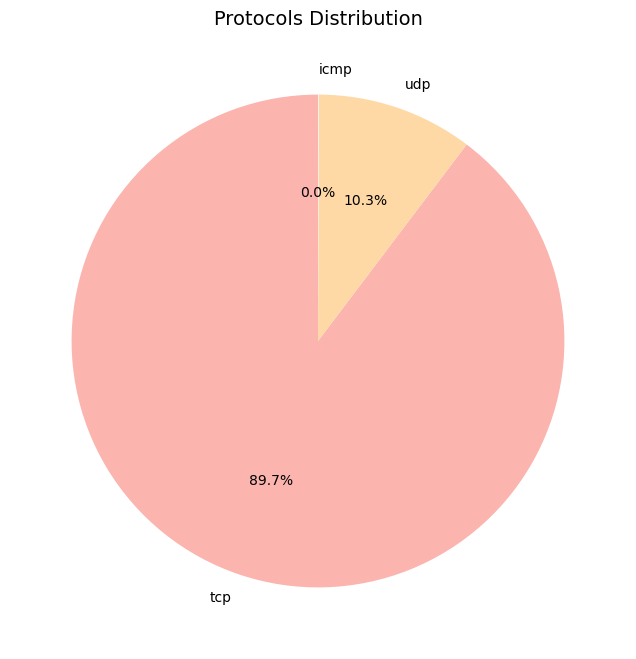

In [11]:
# Protocols Distribution 
protocol_counts = df['proto'].value_counts()

plt.figure(figsize=(8, 8))
protocol_counts.plot(kind='pie', autopct='%1.1f%%', cmap='Pastel1', startangle=90)
plt.title('Protocols Distribution', fontsize=14)
plt.ylabel('')  # Remove default y-label
plt.show()

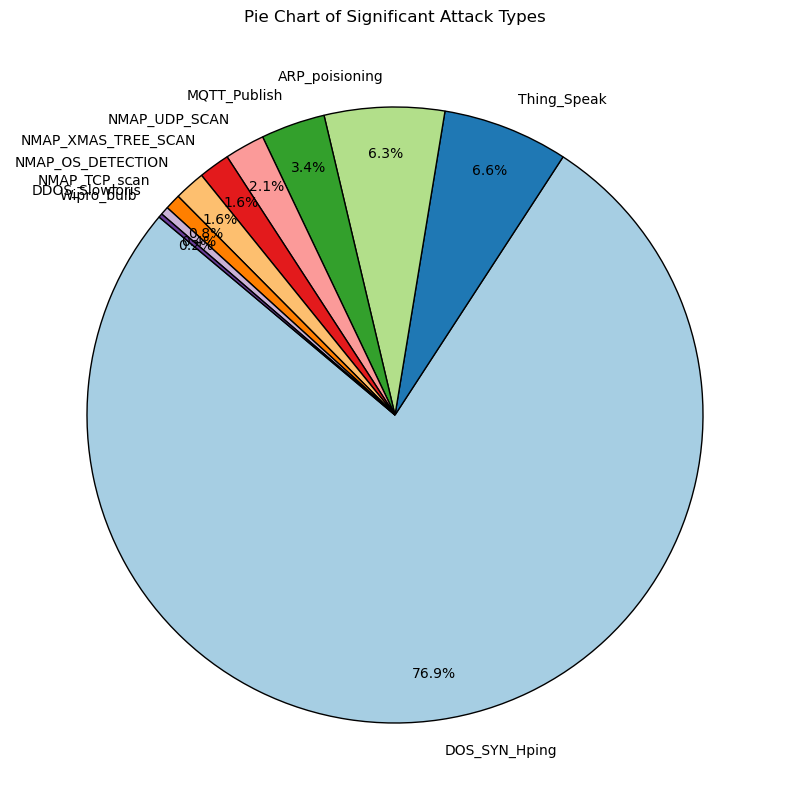

In [12]:


# Compute attack type distribution
attack_type_distribution = df['Attack_type'].value_counts(normalize=True)

# Filter significant attack types (≥ 0.1%)
filtered_attack_types = attack_type_distribution[attack_type_distribution >= 0.001]

# Ensure there are significant types to plot
if not filtered_attack_types.empty:
    colors = plt.cm.Paired.colors[:len(filtered_attack_types)]  # Dynamically assign colors
    plt.figure(figsize=(10, 10))
    filtered_attack_types.plot(
        kind='pie',
        autopct='%1.1f%%',
        colors=colors,
        startangle=140,
        wedgeprops={'edgecolor': 'black'},
        pctdistance=0.85
    )
    plt.title("Pie Chart of Significant Attack Types")
    plt.ylabel('')  # Hide y-label
    plt.show()
else:
    print("No significant attack types found (≥ 0.1%)")


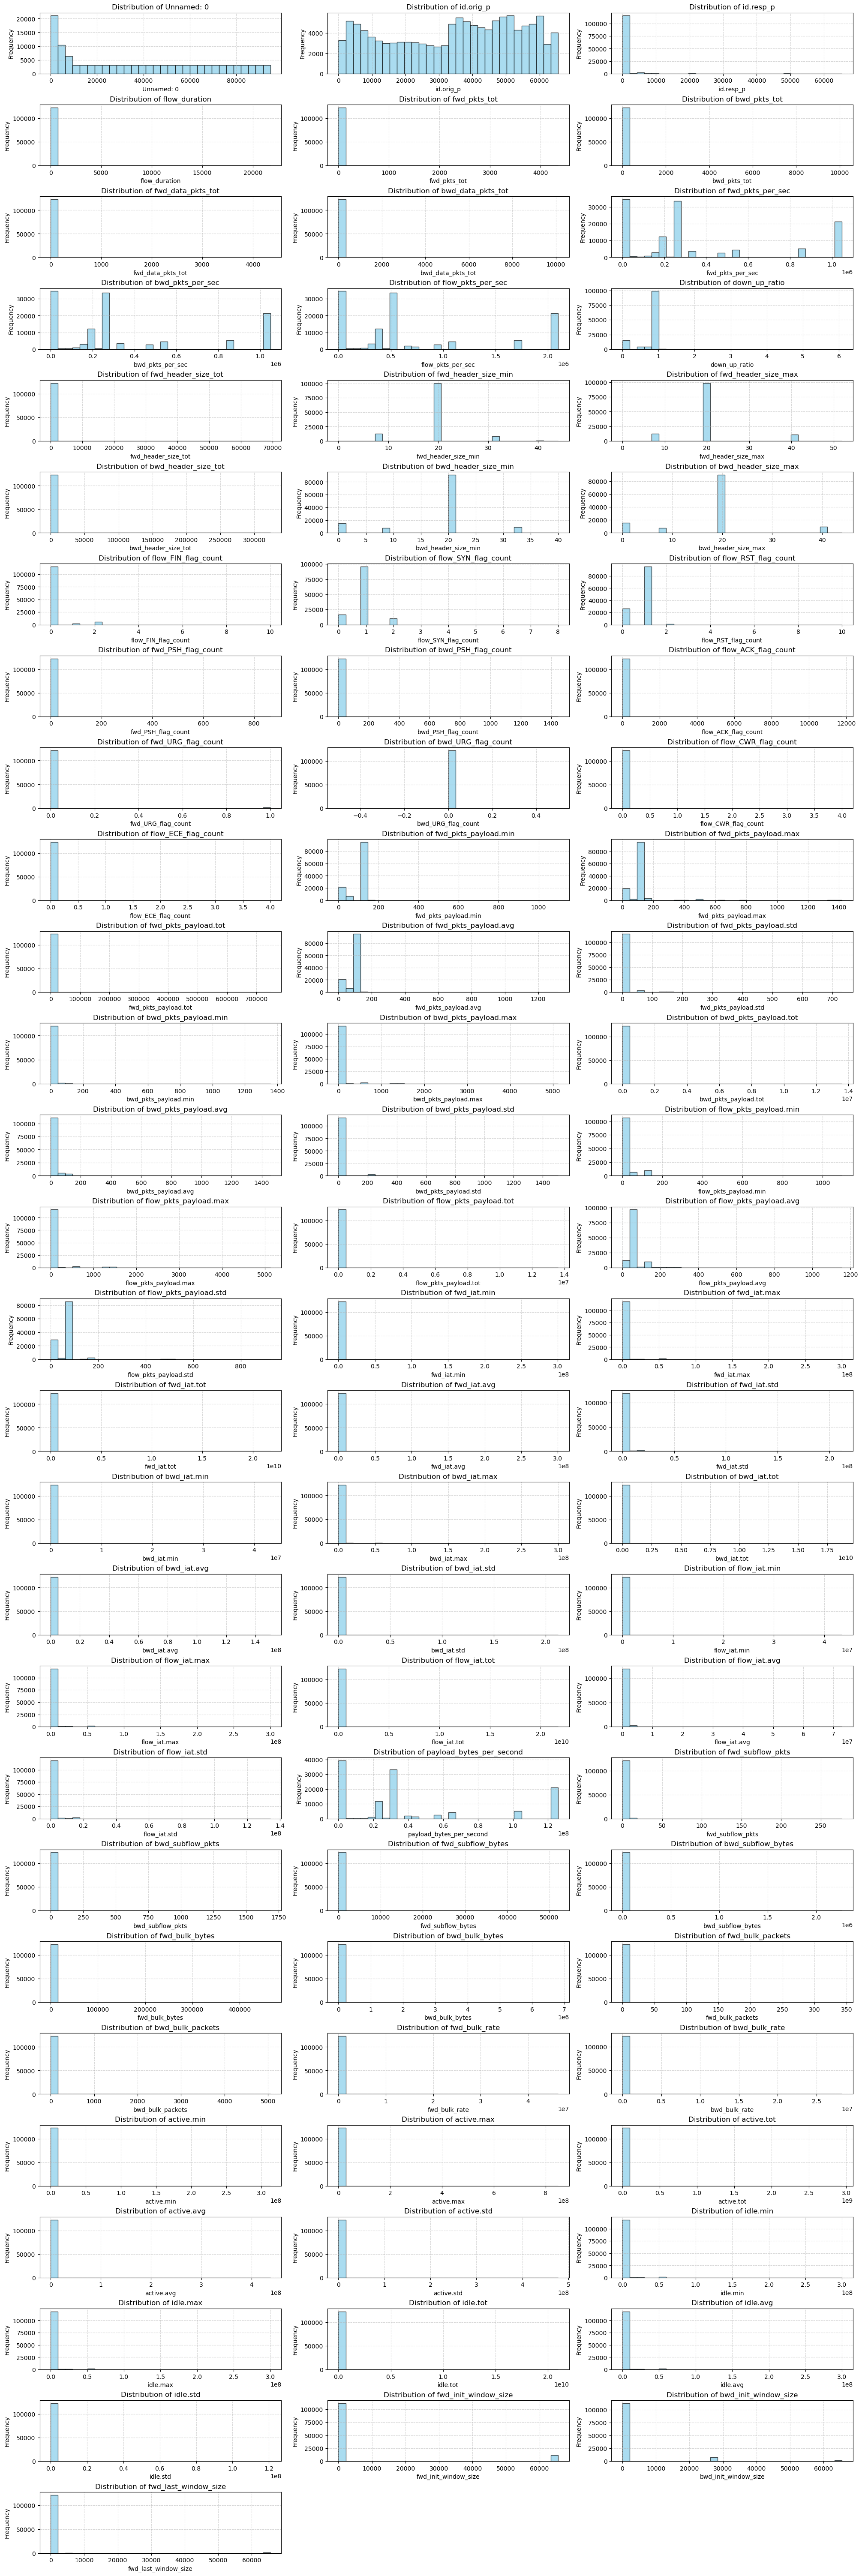

In [13]:
# Select numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Set up the figure size
fig, axes = plt.subplots(nrows=len(numeric_df.columns)//3 + 1, ncols=3, figsize=(20, 60),constrained_layout=True)
axes = axes.flatten()  # Flatten for easy iteration
fig.subplots_adjust(hspace=0.3, wspace=0.5) 

# Plot histograms
for i, col in enumerate(numeric_df.columns):
    axes[i].hist(df[col], bins=30, color="skyblue", edgecolor="black", alpha=0.7)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True, linestyle="--", alpha=0.5)

# Hide empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])


plt.show()

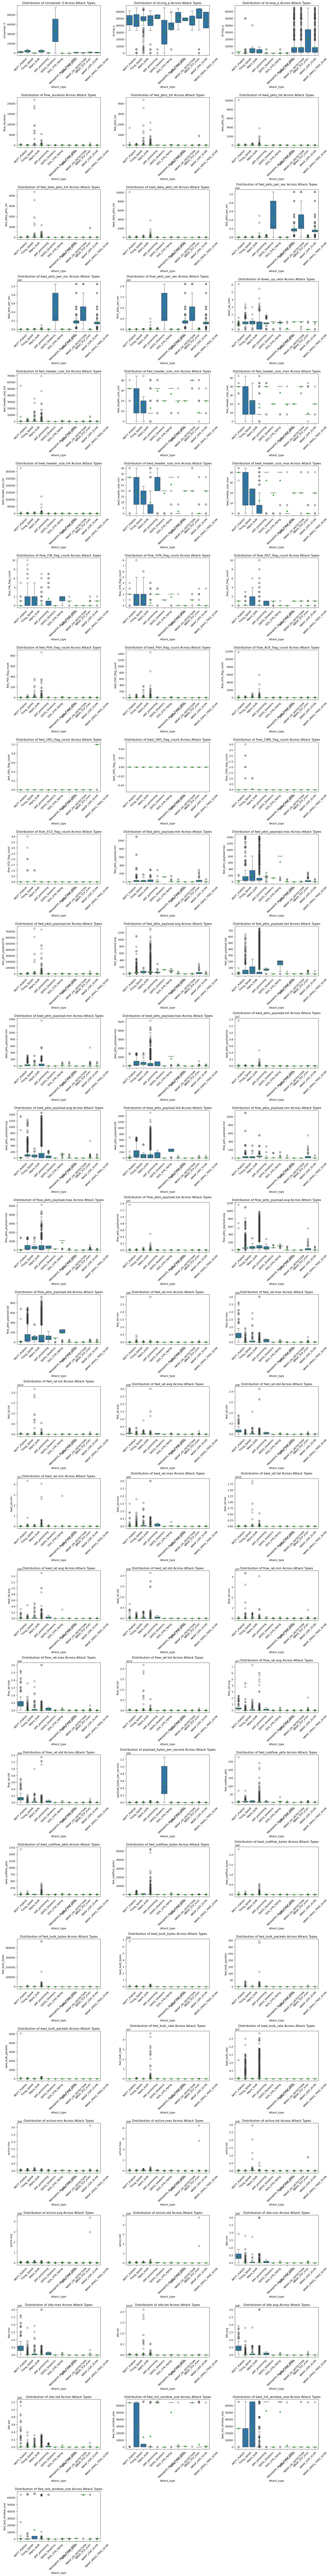

In [14]:


# Select numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Define attack types
attack_types = df["Attack_type"].unique()

# Create subplots
num_features = len(numeric_df.columns)
rows = (num_features // 3) + 1  # Arrange in rows of 3
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(18, rows * 5))  # Adjust height
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Generate boxplots
for i, col in enumerate(numeric_df.columns):
    sns.boxplot(x="Attack_type", y=col, showmeans=True, data=df, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} Across Attack Types")
    axes[i].tick_params(axis="x", rotation=45)  # Rotate x-axis labels

# Hide empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust spacing to avoid overlap
plt.show()


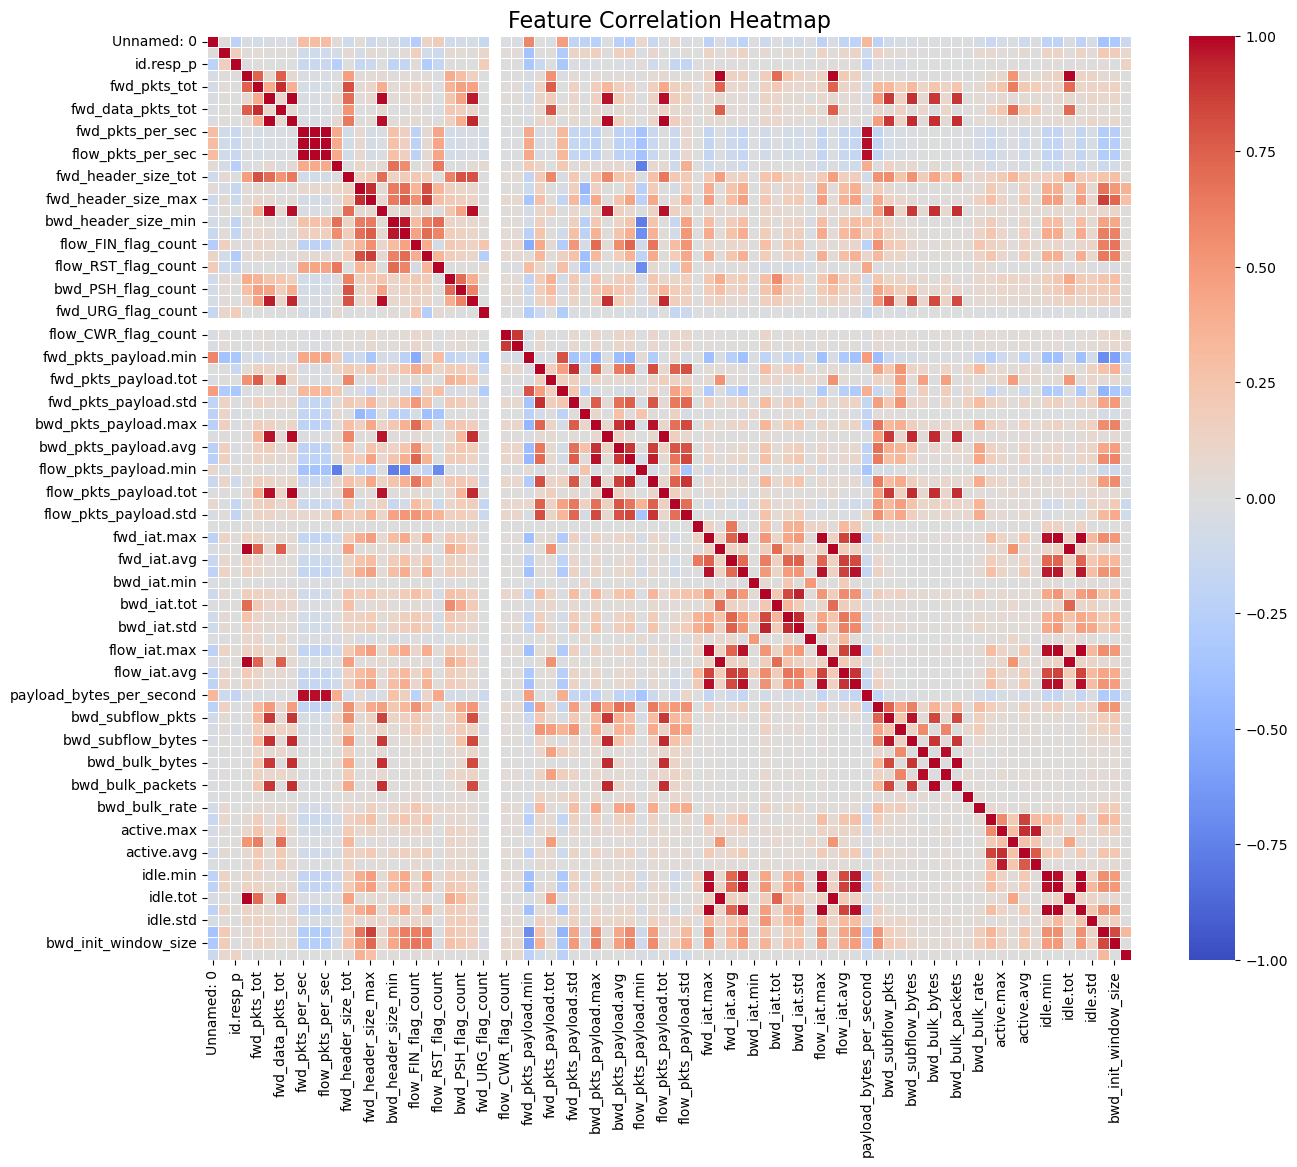

In [15]:
# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Create heatmap
plt.figure(figsize=(15, 12))  # Adjust figure size
sns.heatmap(
    correlation_matrix, 
    annot=False,  # Show correlation values
    fmt=".2f",  # Format decimal places
    cmap="coolwarm",  # Color scheme
    vmin=-1, vmax=1,  # Ensure consistent scale
    linewidths=0.5,  # Add grid lines
    square=True  # Keep cells square-shaped
)

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

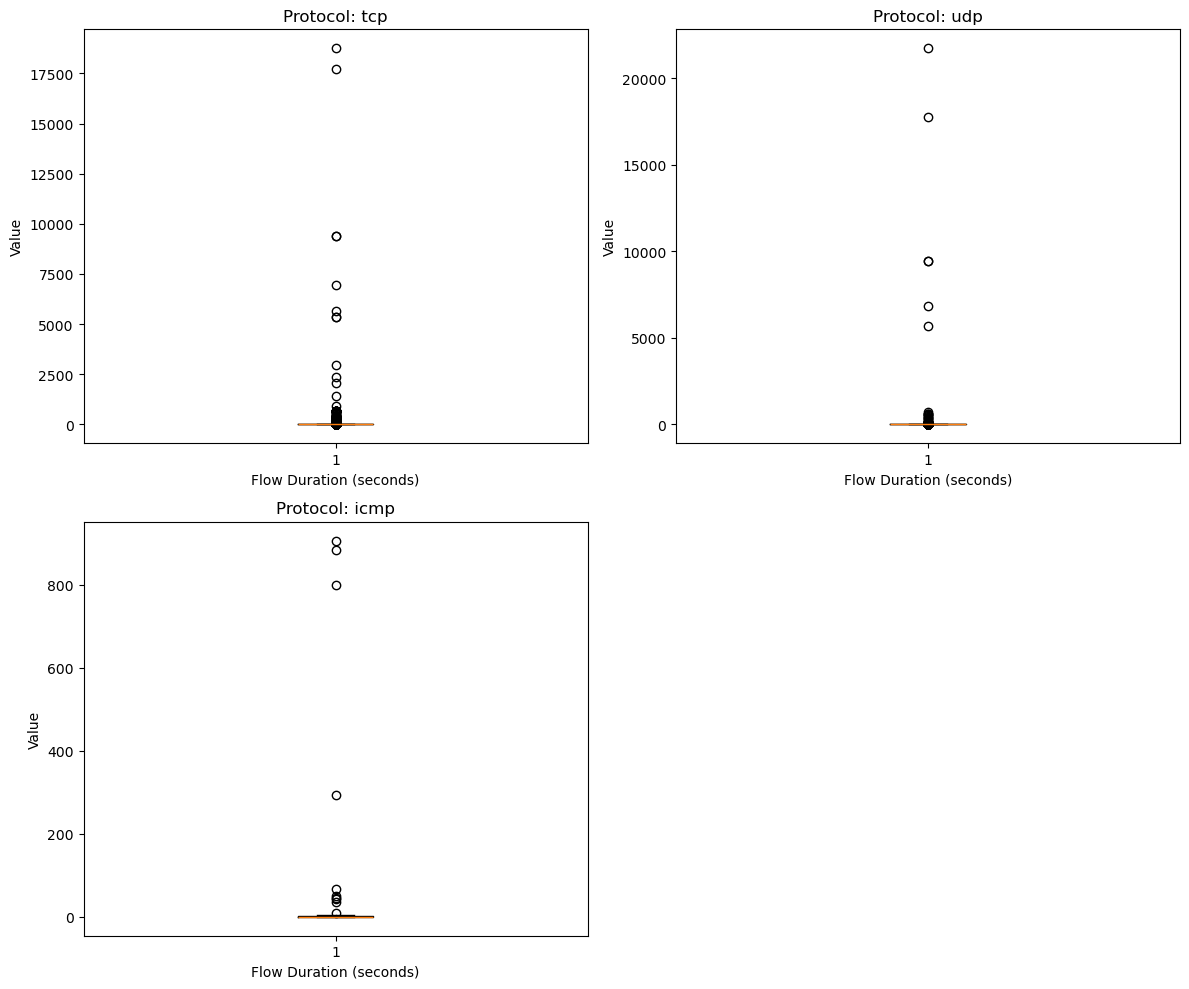

In [16]:


# Get unique protocols
protocols = df['proto'].unique()

# Dynamically determine subplot grid size
num_protocols = len(protocols)
rows = (num_protocols // 2) + (num_protocols % 2)  # Adjust rows dynamically
cols = min(2, num_protocols)  # Max 2 columns

fig, axs = plt.subplots(rows, cols, figsize=(12, 5 * rows))

# Ensure axs is always a 2D array for consistent indexing
axs = axs.reshape(-1) if num_protocols > 1 else [axs]  # Handle single plot case

# Create boxplots for each protocol
for i, proto in enumerate(protocols):
    axs[i].boxplot(df[df['proto'] == proto]['flow_duration'])
    axs[i].set_title(f'Protocol: {proto}')
    axs[i].set_xlabel('Flow Duration (seconds)')
    axs[i].set_ylabel('Value')

# Remove empty subplots if any
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])  # Remove unused axes

plt.tight_layout()
plt.show()

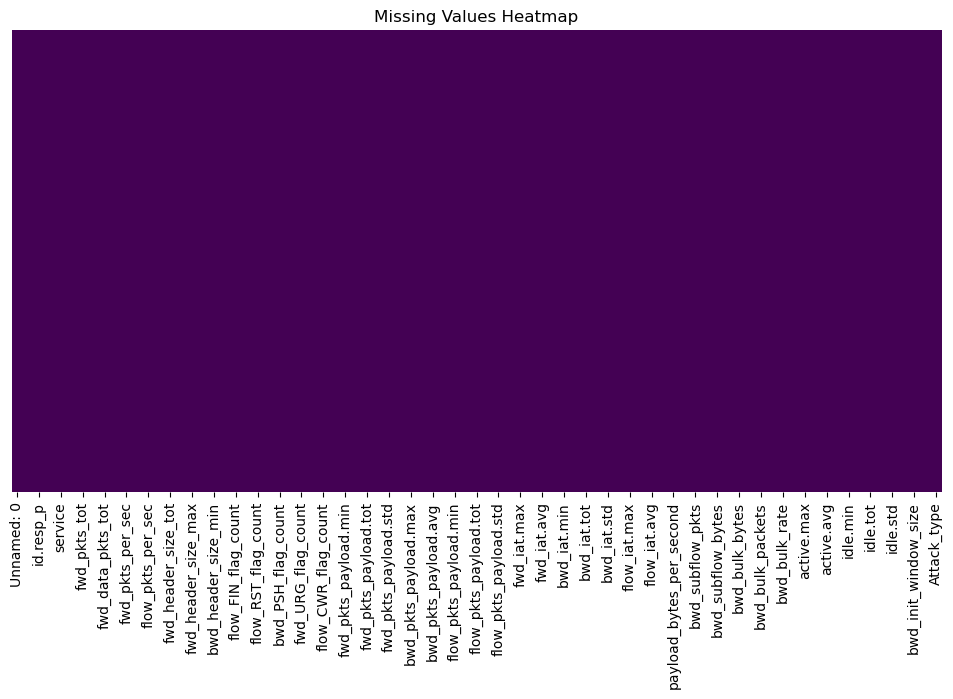

In [17]:


plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

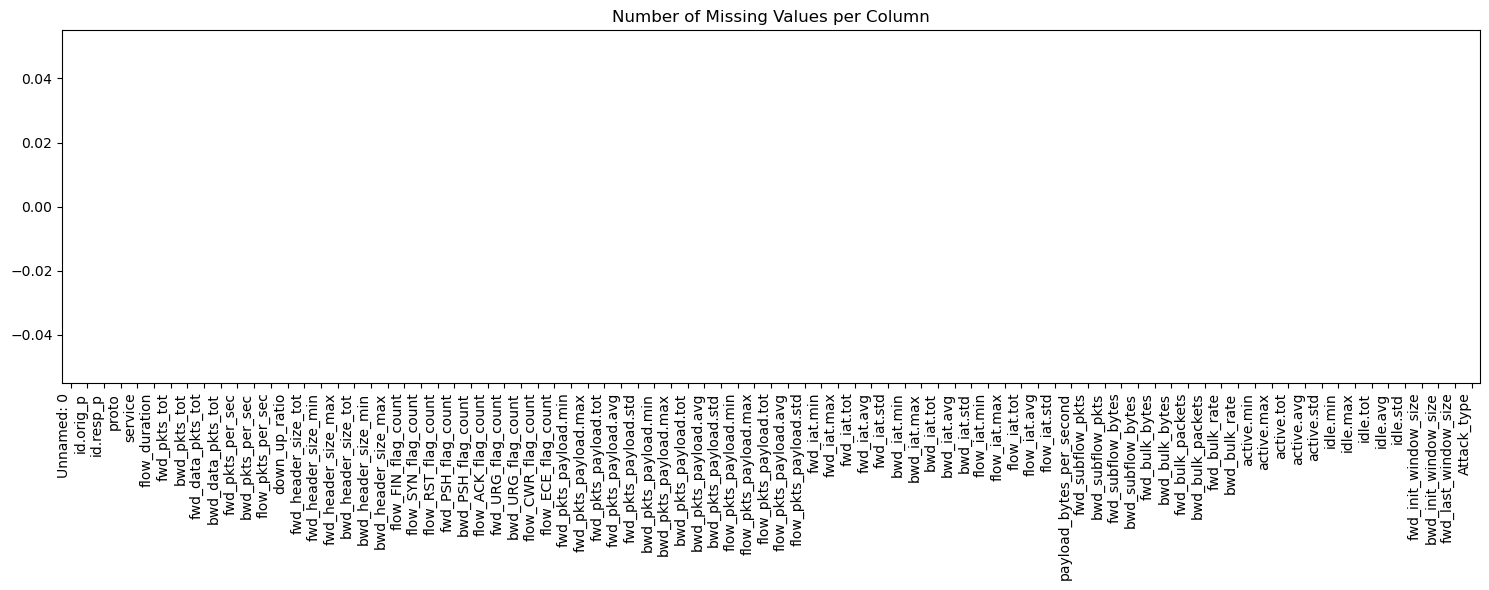

In [18]:
plt.figure(figsize=(15, 6))
df.isnull().sum().plot(kind='bar')
plt.title('Number of Missing Values per Column')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [19]:
proto_mapping = {'tcp': 0, 'udp': 1, 'icmp': 2}
service_mapping = {'mqtt': 0, '-': 1, 'http': 2, 'dns': 3, 'ntp': 4, 'ssl': 5, 'dhcp': 6, 'irc': 7}
attack_type_mapping = {'MQTT_Publish': 0, 'Thing_Speak': 1, 'Wipro_bulb': 2, 'ARP_poisoning': 3}

# Apply mapping and handle missing values
df['proto'] = df['proto'].map(proto_mapping).fillna(-1).astype(int)
df['service'] = df['service'].map(service_mapping).fillna(-1).astype(int)
df['Attack_type'] = df['Attack_type'].map(attack_type_mapping).fillna(-1).astype(int)  # Target encoding


In [20]:
df["proto"].unique()
df["service"].unique()
df["Attack_type"].unique()

array([ 0,  1,  2, -1])

In [21]:
df

Unnamed: 0  id.orig_p  id.resp_p  proto  service  flow_duration  \
0                0      38667       1883      0        0      32.011598   
1                1      51143       1883      0        0      31.883584   
2                2      44761       1883      0        0      32.124053   
3                3      60893       1883      0        0      31.961063   
4                4      51087       1883      0        0      31.902362   
...            ...        ...        ...    ...      ...            ...   
123112        2005      59247      63331      0        1       0.000006   
123113        2006      59247      64623      0        1       0.000007   
123114        2007      59247      64680      0        1       0.000006   
123115        2008      59247      65000      0        1       0.000006   
123116        2009      59247      65129      0        1       0.000006   

        fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
0                  9             5                  3                  3  ...   
1                  9             5                  3                  3  ...   
2                  9             5                  3                  3  ...   
3                  9             5                  3                  3  ...   
4                  9             5                  3                  3  ...   
...              ...           ...                ...                ...  ...   
123112             1             1                  0                  0  ...   
123113             1             1                  0                  0  ...   
123114             1             1                  0                  0  ...   
123115             1             1                  0                  0  ...   
123116             1             1                  0                  0  ...   

        active.std      idle.min      idle.max      idle.tot      idle.avg  \
0              0.0  2.972918e+07  2.972918e+07  2.972918e+07  2.972918e+07   
1              0.0  2.985528e+07  2.985528e+07  2.985528e+07  2.985528e+07   
2              0.0  2.984215e+07  2.984215e+07  2.984215e+07  2.984215e+07   
3              0.0  2.991377e+07  2.991377e+07  2.991377e+07  2.991377e+07   
4              0.0  2.981470e+07  2.981470e+07  2.981470e+07  2.981470e+07   
...            ...           ...           ...           ...           ...   
123112         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123113         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123114         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123115         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123116         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

        idle.std  fwd_init_window_size  bwd_init_window_size  \
0            0.0                 64240                 26847   
1            0.0                 64240                 26847   
2            0.0                 64240                 26847   
3            0.0                 64240                 26847   
4            0.0                 64240                 26847   
...          ...                   ...                   ...   
123112       0.0                  1024                     0   
123113       0.0                  1024                     0   
123114       0.0                  1024                     0   
123115       0.0                  1024                     0   
123116       0.0                  1024                     0   

        fwd_last_window_size  Attack_type  
0                        502            0  
1                        502            0  
2                        502            0  
3                        502            0  
4                        502            0  
...                      ...          ...  
123112                  1024           -1  
123113                  1024           -1  
123114                  1024    

In [22]:
for feature in df.columns:
    print(f"unique values of {feature} : ")
    print("*************************************************")
    print(df[feature].unique())
    print("\n")

unique values of Unnamed: 0 : 
*************************************************
[    0     1     2 ... 94656 94657 94658]


unique values of id.orig_p : 
*************************************************
[38667 51143 44761 ... 64611 28723 28708]


unique values of id.resp_p : 
*************************************************
[ 1883    80    53 ... 45685 49179 58631]


unique values of proto : 
*************************************************
[0 1 2]


unique values of service : 
*************************************************
[ 0  1  2  3  4  5  6  7 -1]


unique values of flow_duration : 
*************************************************
[3.2011598e+01 3.1883584e+01 3.2124053e+01 ... 3.6275000e-02 8.4000000e-05
 5.1000000e-05]


unique values of fwd_pkts_tot : 
*************************************************
[   9    8   11   10    1    7    6    2 1661  216    3    5   13   92
   40   19   18   32    4    0   16   72   17   14   12   15   25   35
   38   22   74   81   23   21

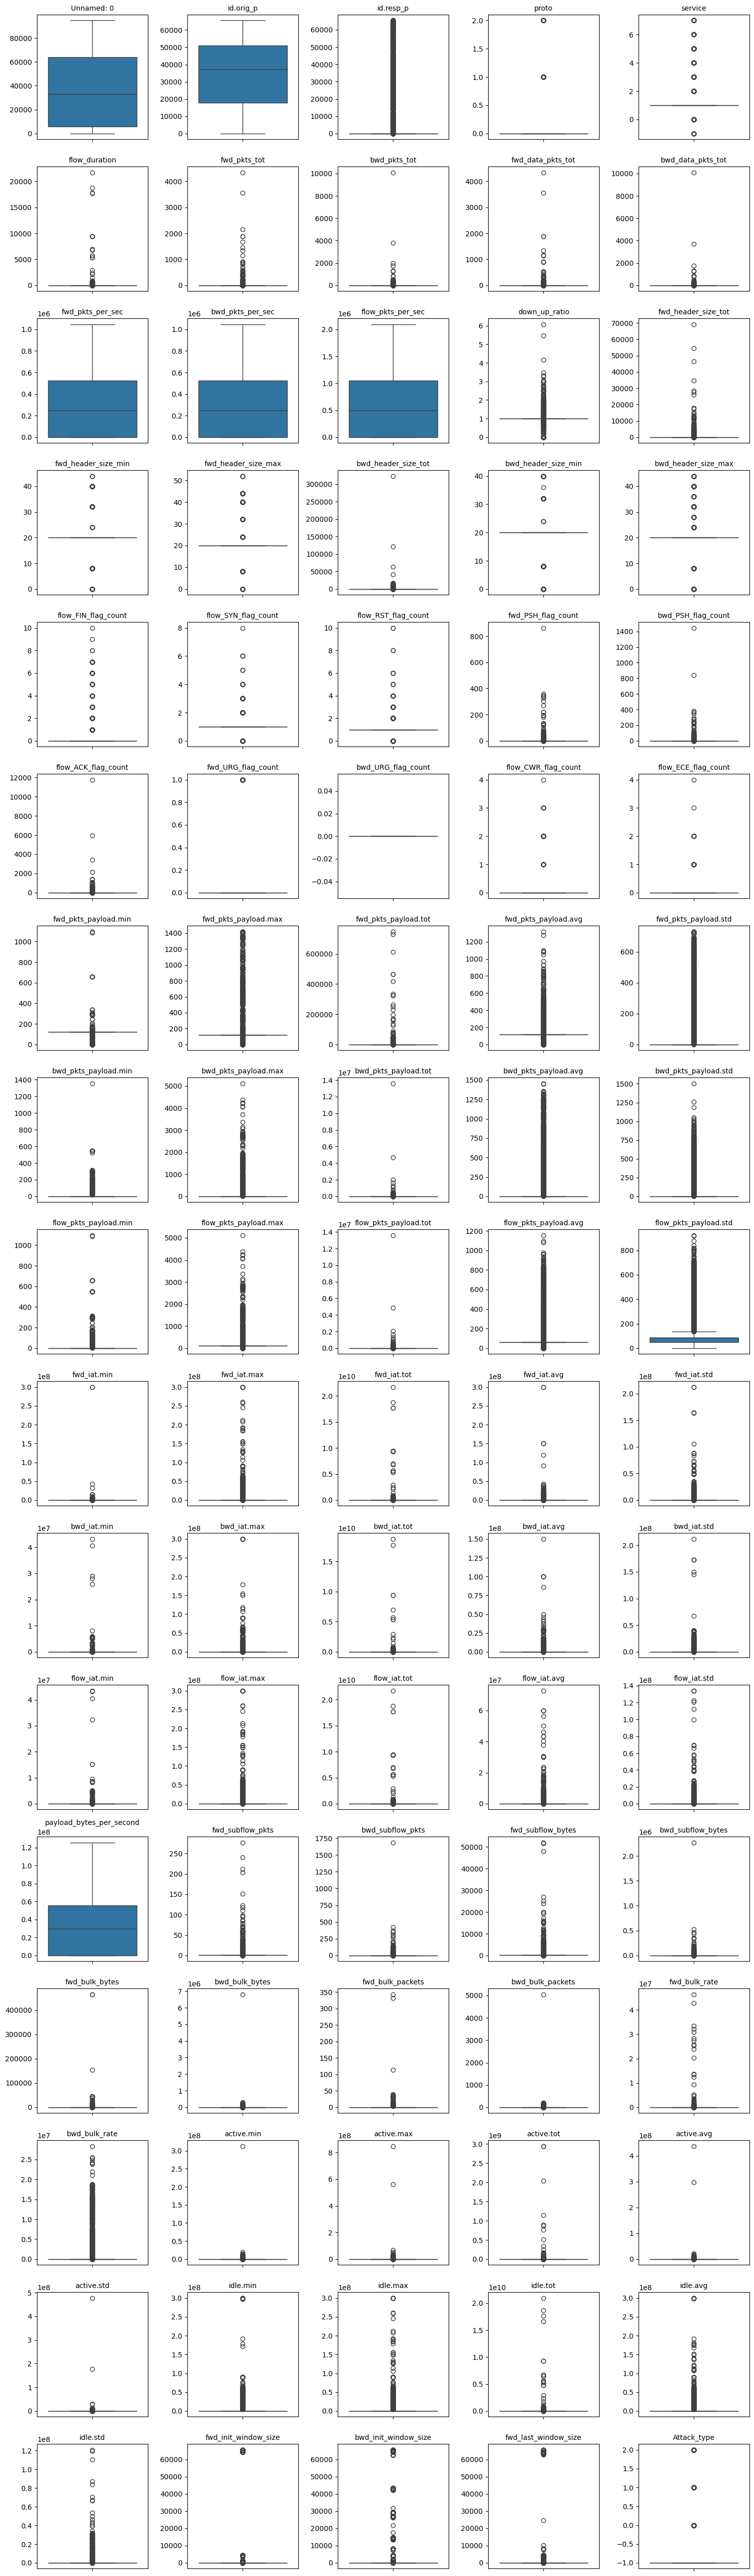

In [23]:

# Select first 120 columns (adjust as needed)
cols = df.columns[:85]  

# Dynamically determine rows & columns for subplots
n_cols = 5  # Number of columns per row
n_rows = int(np.ceil(len(cols) / n_cols))  # Calculate required rows

# Create subplots
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 3 * n_rows), dpi=100)
ax = ax.flatten()  # Flatten for easier indexing

# Loop through columns and plot boxplots
for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=ax[i])  # Use seaborn for better visualization
    ax[i].set_title(col, fontsize=10)  # Title for each boxplot
    ax[i].set_ylabel("")  # Remove unnecessary y-labels

# Hide any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])  

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [24]:


# Select only numerical columns, excluding encoded categorical features
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Exclude encoded categorical columns (proto, service, Attack_type)
numeric_cols = [col for col in numeric_cols if col not in ['proto', 'service', 'Attack_type']]

# Compute Q1, Q3, and IQR for numerical columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outlier_mask = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers and create a new cleaned DataFrame
df_cleaned = df[~outlier_mask].copy()

# Reset index for better structure
df_cleaned.reset_index(drop=True, inplace=True)

# Print summary
print(f"Original dataset size: {df.shape[0]} rows")
print(f"Cleaned dataset size: {df_cleaned.shape[0]} rows")
print(f"Number of outliers removed: {df.shape[0] - df_cleaned.shape[0]}")


Original dataset size: 123117 rows
Cleaned dataset size: 84822 rows
Number of outliers removed: 38295


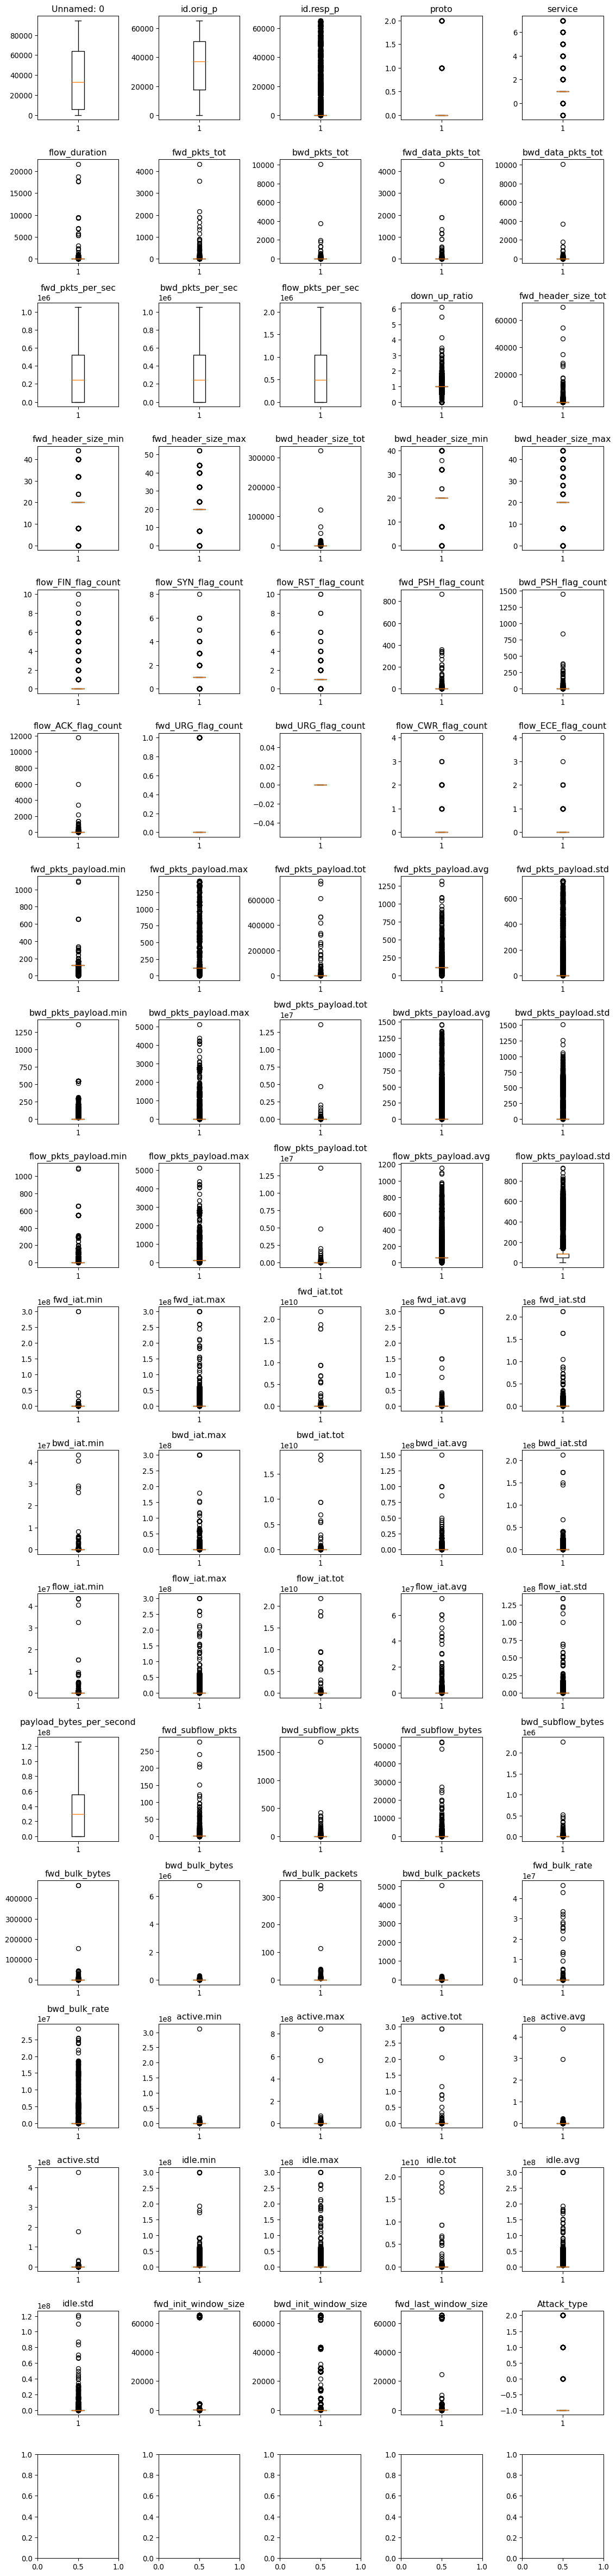

In [25]:
cols = df.columns[:85]  # Select first 30 columns (adjust as needed)

fig, ax = plt.subplots(nrows=18, ncols=5, dpi=95, figsize=(12, 50))
ax = ax.flatten()  # Convert 2D array to 1D for easier indexing

# Loop through columns and plot boxplots
for i, col in enumerate(cols):
    ax[i].boxplot(df[col])
    ax[i].set_title(col)  # Set title instead of ylabel for better layout

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

In [26]:
df.describe().T

count          mean           std  min      25%  \
Unnamed: 0            123117.0  37035.089248  3.045911e+04  0.0   6059.0   
id.orig_p             123117.0  34639.258738  1.907062e+04  0.0  17702.0   
id.resp_p             123117.0   1014.305092  5.256372e+03  0.0     21.0   
proto                 123117.0      0.103536  3.061744e-01  0.0      0.0   
service               123117.0      1.246115  8.346395e-01 -1.0      1.0   
...                        ...           ...           ...  ...      ...   
idle.std              123117.0  45501.831692  1.091361e+06  0.0      0.0   
fwd_init_window_size  123117.0   6118.905123  1.871631e+04  0.0     64.0   
bwd_init_window_size  123117.0   2739.776018  1.001885e+04  0.0      0.0   
fwd_last_window_size  123117.0    751.647514  6.310184e+03  0.0     64.0   
Attack_type           123117.0     -0.828448  5.349451e-01 -1.0     -1.0   

                          50%      75%           max  
Unnamed: 0            33100.0  63879.0  9.465800e+04  
id.orig_p             37221.0  50971.0  6.553500e+04  
id.resp_p                21.0     21.0  6.538900e+04  
proto                     0.0      0.0  2.000000e+00  
service                   1.0      1.0  7.000000e+00  
...                       ...      ...           ...  
idle.std                  0.0      0.0  1.208029e+08  
fwd_init_window_size     64.0     64.0  6.553500e+04  
bwd_init_window_size      0.0      0.0  6.553500e+04  
fwd_last_window_size     64.0     64.0  6.553500e+04  
Attack_type              -1.0     -1.0  2.000000e+00  

[85 rows x 8 columns]

Class Distribution Before SMOTE: Counter({-1: 110610, 1: 8108, 0: 4146, 2: 253})


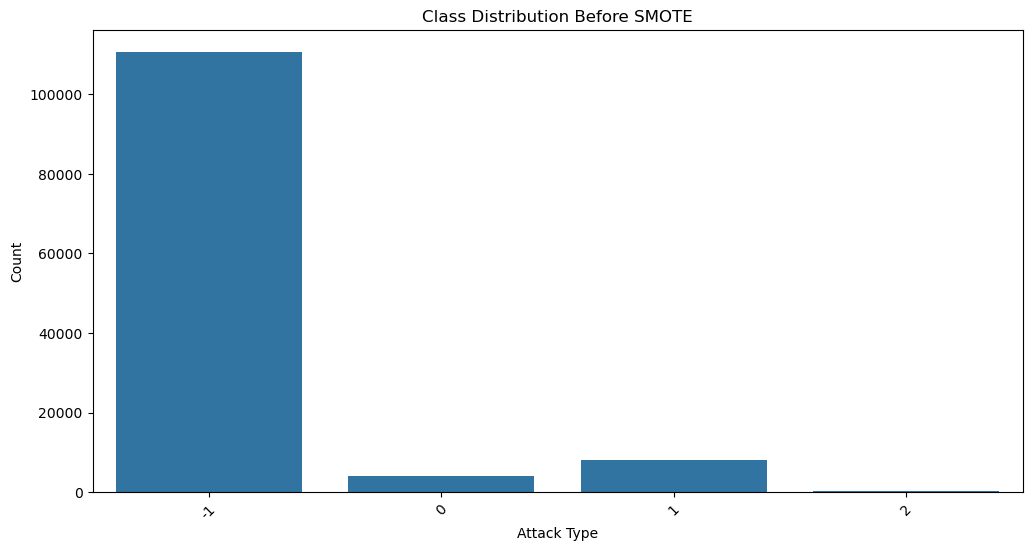

In [27]:


# Count occurrences of each class
class_counts = Counter(df["Attack_type"])

# Print class distribution
print("Class Distribution Before SMOTE:", class_counts)

# Plot class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Class Distribution Before SMOTE")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


Class Distribution After SMOTE: Counter({-1: 88488, 1: 88488, 0: 88488, 2: 88488})


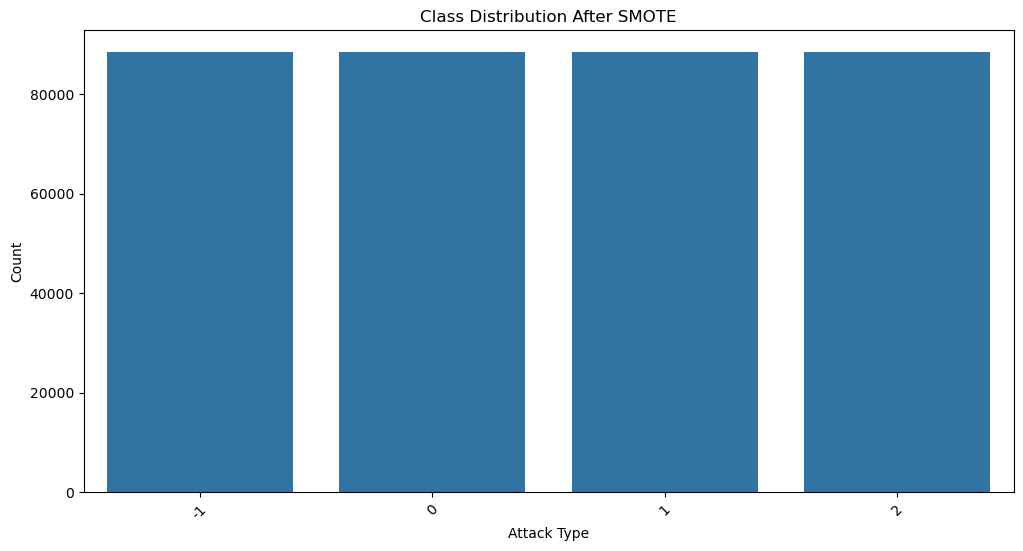

In [28]:

# Split dataset into features (X) and target (y)
X = df.drop(columns=["Attack_type"])
y = df["Attack_type"]

# Train-test split (stratify ensures balanced split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE for oversampling minority classes
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Check class distribution after SMOTE
balanced_counts = Counter(y_train_balanced)
print("Class Distribution After SMOTE:", balanced_counts)

# Plot new class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=list(balanced_counts.keys()), y=list(balanced_counts.values()))
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Class Distribution After SMOTE")
plt.xticks(rotation=45)
plt.show()


# Logistic Regression

✅ Model Accuracy: 0.9743

📊 Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.97      0.99     22122
           0       1.00      1.00      1.00       829
           1       0.74      0.98      0.84      1622
           2       0.42      0.84      0.56        51

    accuracy                           0.97     24624
   macro avg       0.79      0.95      0.85     24624
weighted avg       0.98      0.97      0.98     24624



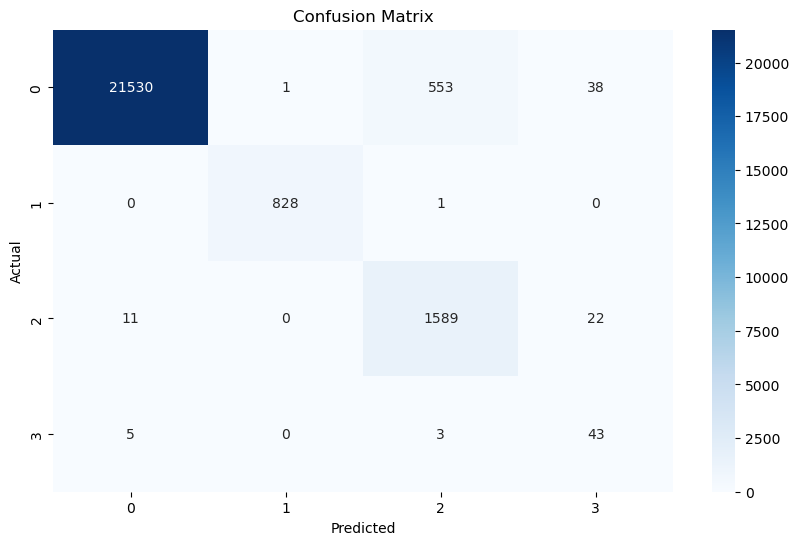

In [31]:

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on SMOTE-balanced data
log_reg.fit(X_train_balanced, y_train_balanced)

# Predict on test data (Use scaled test data)
y_pred = log_reg.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.4f}")

# Print classification report
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# KNN


✅ Model Accuracy: 0.9963

📊 Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00     22122
           0       1.00      1.00      1.00       829
           1       0.96      0.99      0.97      1622
           2       0.85      0.92      0.89        51

    accuracy                           1.00     24624
   macro avg       0.95      0.98      0.96     24624
weighted avg       1.00      1.00      1.00     24624



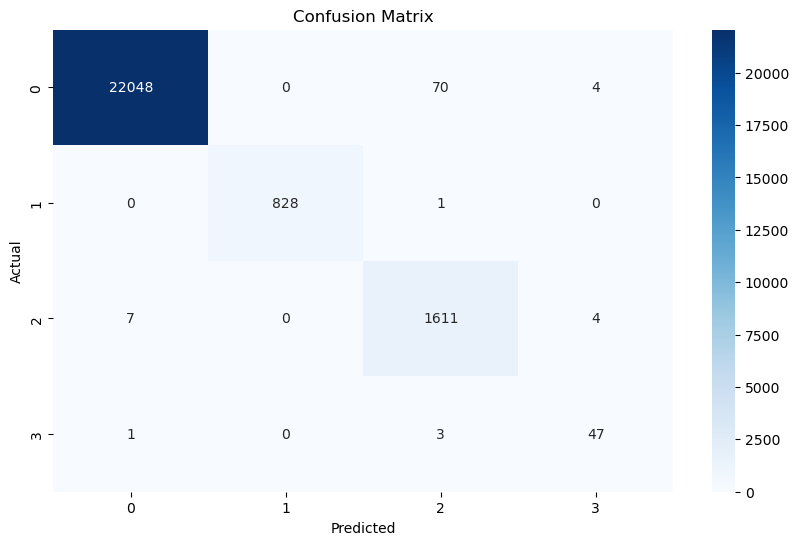

In [33]:


# Initialize KNN model (with k=5, can be tuned)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model on SMOTE-balanced data
knn.fit(X_train_balanced, y_train_balanced)

# Predict on test data (Use scaled test data)
y_pred = knn.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.4f}")

# Print classification report
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# DECISION TREE

In [35]:



# Train a Decision Tree classifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)

# Predict on test set
y_pred = dt_model.predict(X_test_scaled)

# Evaluate model performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9992283950617284

Confusion Matrix:
 [[22110     4     7     1]
 [    0   828     1     0]
 [    6     0  1616     0]
 [    0     0     0    51]]

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00     22122
           0       1.00      1.00      1.00       829
           1       1.00      1.00      1.00      1622
           2       0.98      1.00      0.99        51

    accuracy                           1.00     24624
   macro avg       0.99      1.00      1.00     24624
weighted avg       1.00      1.00      1.00     24624



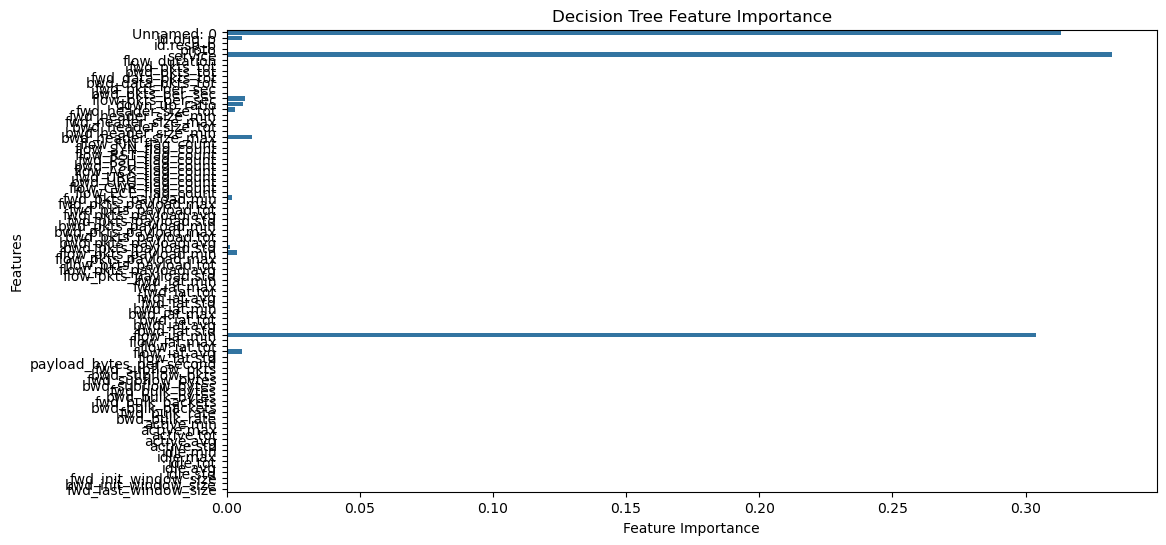

In [36]:


feature_importances = dt_model.feature_importances_
feature_names = X.columns  # Use original feature names

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Decision Tree Feature Importance")
plt.show()


# Random Forest

In [38]:


# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Predict on test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9992283950617284

Confusion Matrix:
 [[22113     0     9     0]
 [    0   828     1     0]
 [    7     0  1615     0]
 [    2     0     0    49]]

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00     22122
           0       1.00      1.00      1.00       829
           1       0.99      1.00      0.99      1622
           2       1.00      0.96      0.98        51

    accuracy                           1.00     24624
   macro avg       1.00      0.99      0.99     24624
weighted avg       1.00      1.00      1.00     24624



##  Feature Importance Analysis of Random Forest Model

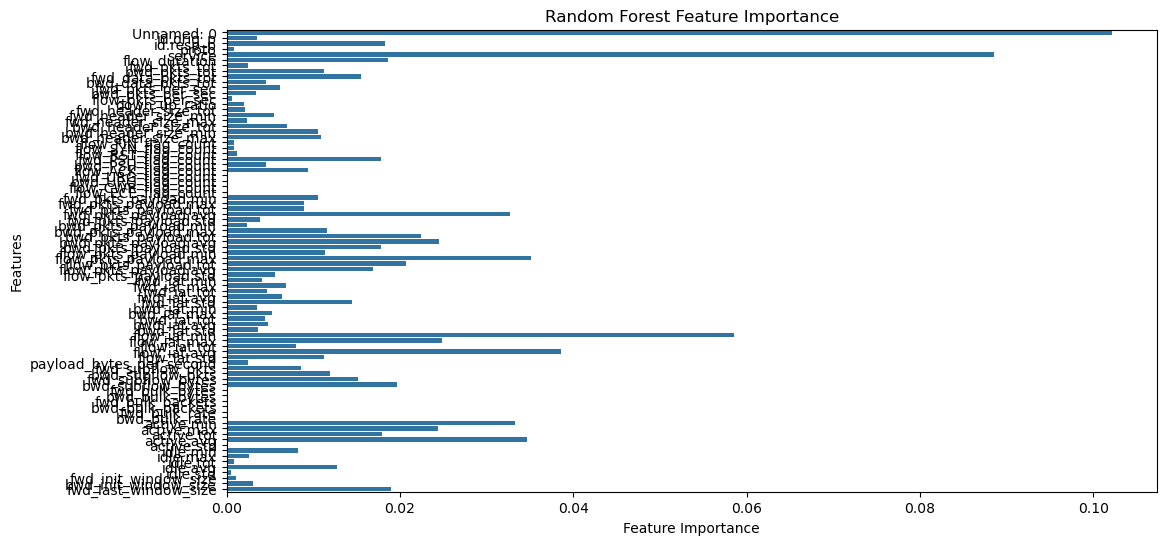

In [40]:


feature_importances = rf_model.feature_importances_
feature_names = X.columns  # Use original feature names

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()


# Implementing Ridge Classifier

In [42]:


# Train Ridge Classifier
ridge_clf = RidgeClassifier(alpha=1.0)
ridge_clf.fit(X_train_balanced, y_train_balanced)

# Predict on test data
y_pred = ridge_clf.predict(X_test_scaled)

# Evaluate performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9196718648473035

Confusion Matrix:
 [[20208    88  1361   465]
 [    1   828     0     0]
 [   16     4  1566    36]
 [    2     1     4    44]]

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.91      0.95     22122
           0       0.90      1.00      0.95       829
           1       0.53      0.97      0.69      1622
           2       0.08      0.86      0.15        51

    accuracy                           0.92     24624
   macro avg       0.63      0.94      0.68     24624
weighted avg       0.96      0.92      0.93     24624



d